## NuAncestor Telescope Visibility

The following script is written to plot a diversity of relevant quantities for the nuAncestor mission. The script takes as input the data computed with the FreeFlyer script which is part of the repository. The quantities that we are currently investigating are the satellite-telescope distance, velocity, acceleration. Furthermore, the visibility of the satellite is studied and the correspondig required tracking speed. 

Version 23/02/2025 by Blanca Crazzolara

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chardet

In [12]:
colors = ['r', 'blueviolet', 'cyan', 'orange', 'lime']
label = ["Chile", "La Palma", "Hawaii", "SALT", "DAG"]

def plotting(folder, filepath, title, ylabel, cols, saving_name, xlim):
    #df = pd.read_csv(folder + filepath, delimiter='\t', skiprows = 3, header = None)
    df = pd.read_csv(folder + filepath, skiprows = 3, sep='\s+')
    
    df = np.asarray(df)
    dat = 1.*(df.T)
    df = df.T
    dat[dat == 0] = np.nan
    
    shape = dat.shape
    N = int(shape[1]/2)
    plt.figure(figsize = (8, 5))

    for i in cols:
        plt.plot(dat[0], dat[i+1], label = label[i], linewidth = 1.0, color = colors[i])
    plt.title(title)
    plt.xlabel("time [d]")
    plt.ylabel(ylabel)
    plt.legend()
    plt.xlim(*xlim)
    #plt.xlim(0,5)
    plt.savefig(saving_name)

    if(title == "Distance"):
        
        v_r = np.ones_like(df[:,:-1])
        a_r = np.ones_like(df[:,:-2])
        for i in cols:
            r = 1.*df[i+1]
            v_r[i+1] = (r[1:] - r[:-1])/(df[0,1] - df[0,0])/24./3600 #np.gradient(df[2*i+1], (df[0,1] - df[0,0])*24.*3600)
            
            a_r[i+1] = (v_r[i+1,1:] - v_r[i+1,:-1])/(df[0,1] - df[0,0])/24./3600
        v_r[(df[:,:-1]==0) | (df[:,1:]==0)] = 0
        a_r[(v_r[:,:-1]==0) | (v_r[:,1:]==0)] = 0
        v_r[v_r ==0] = np.nan
        a_r[a_r==0] = np.nan
            
            


        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[0, 1:], v_r[i+1], label = label[i], linewidth = 1.0, color = colors[i])
        plt.title("Line-of-Sight Velocity")
        plt.xlabel("time [d]")
        plt.ylabel("km/s")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "Velocity.png")

        C = 299792.458
        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[0, 1:], v_r[i+1]/C, label = label[i], linewidth = 1.0, color = colors[i])
        plt.title("Doppler Shift")
        plt.xlabel("time [d]")
        plt.ylabel(r"$\Delta \lambda / \lambda$")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "DopplerShift.png")


    
        plt.figure(figsize = (8, 5))
        for i in cols:
            plt.plot(df[0, 1:-1], 1e5*a_r[i+1], label = label[i],  linewidth = 1.0, color = colors[i])
        plt.title("Line-of-Sight Acceleration")
        plt.xlabel("time [d]")
        plt.ylabel("cm/s^2")
        plt.legend()
        plt.xlim(*xlim)
        #plt.xlim(0,5)
        plt.savefig(folder + "Acceleration.png")

def plot_visibility(folder, filepath, title, ylabel, cols, saving_name, xlim):
    df = pd.read_csv(folder + filepath, skiprows = 3, sep='\s+')
    
    df = np.asarray(df)
    dat = 1.*(df.T)
    df = df.T
    days = np.floor(dat[0]) + 0.5
    hour = (dat[0] - np.floor(dat[0]))*24
    
    shape = dat.shape
    N = int(shape[1]/2)
    
    plt.figure(figsize = (8,5))
    #ax = fig.add_subplot(projection='3d')
    plt.minorticks_on()
    plt.grid(which = "both",zorder=-1.0, alpha = 0.3)
    markersize = 1/ xlim[1] *100 * 30
    for i in cols:
        plt.scatter(days[dat[i+1] == 1], hour[dat[i+1] == 1], label = label[i], color = colors[i], marker = "_", s = markersize, alpha = 0.15, zorder = 1)
    plt.title(title)
    plt.xlabel("days")
    plt.ylabel("time [h]")
    #plt.legend()
    plt.xlim(*xlim)
    plt.ylim(0,24)
    leg = plt.legend()    
    for lh in leg.legendHandles: 
        lh.set_alpha(1)
    
    plt.savefig(saving_name)



C:\Users\blanc\AppData\Local\Temp\ipykernel_14688\1539955048.py:106: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


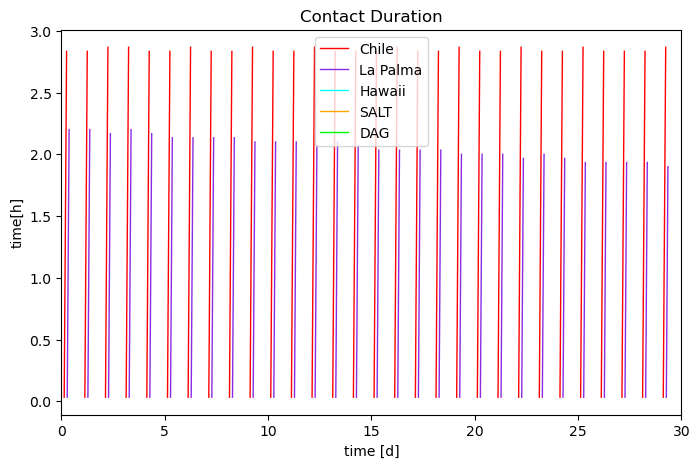

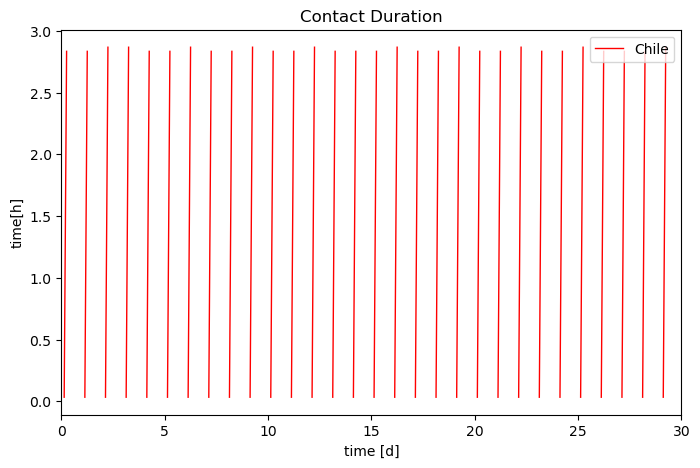

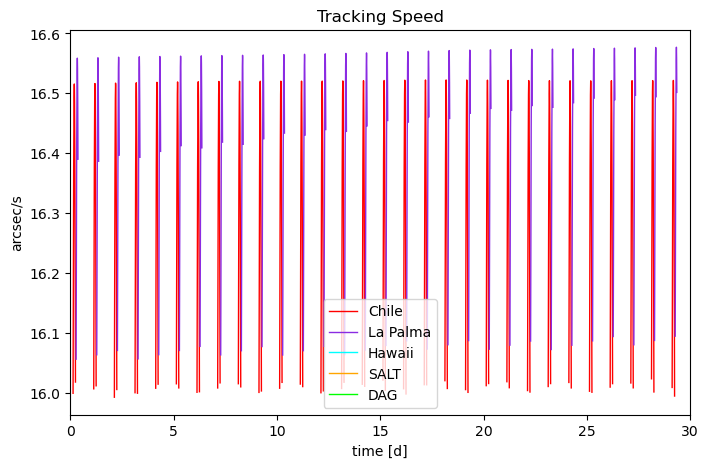

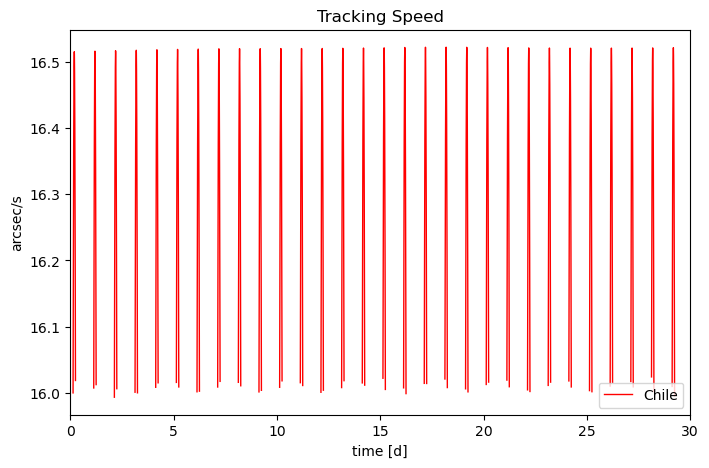

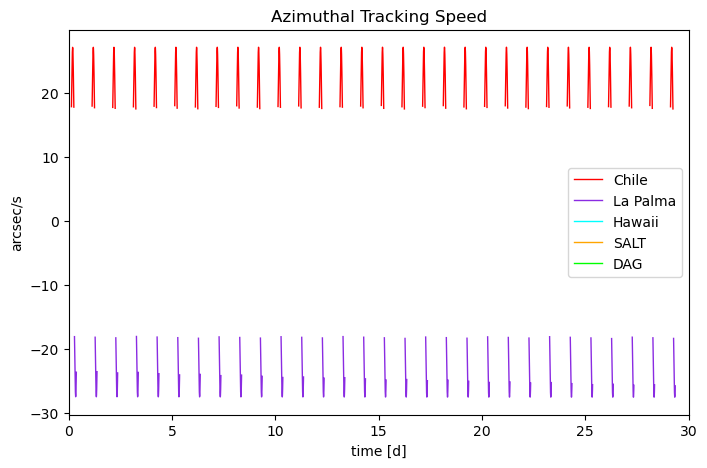

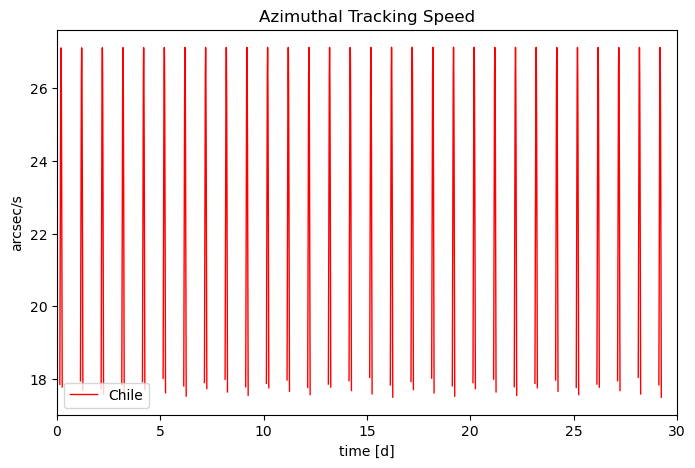

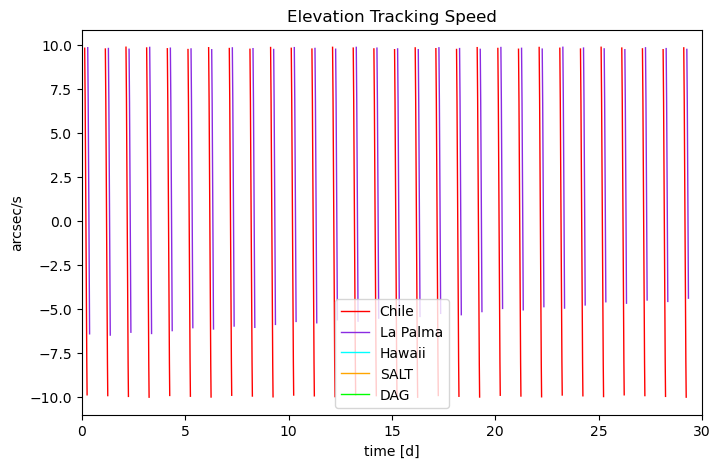

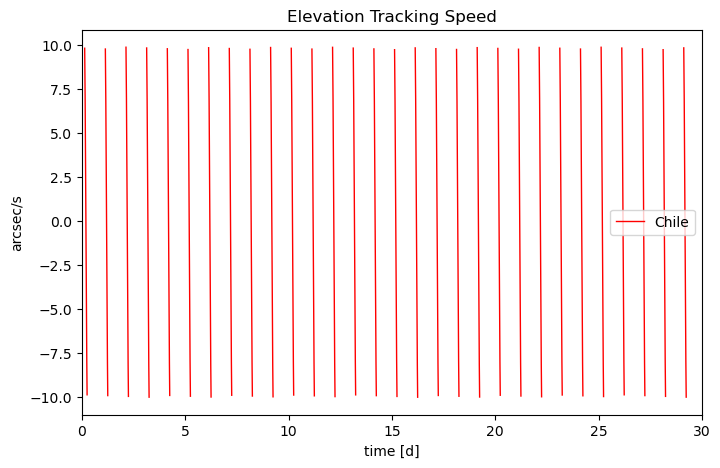

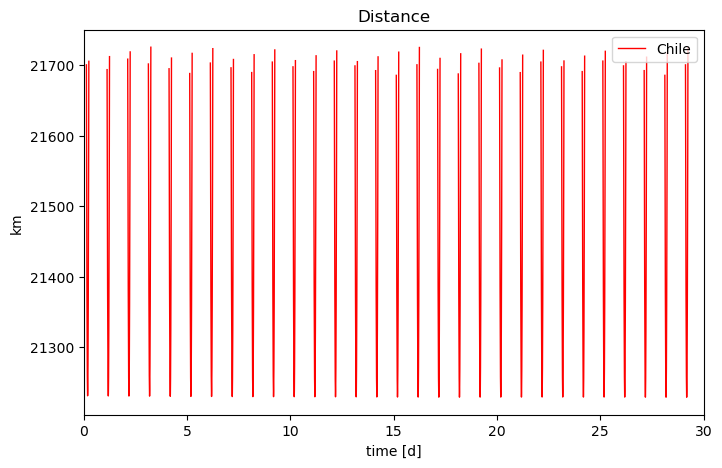

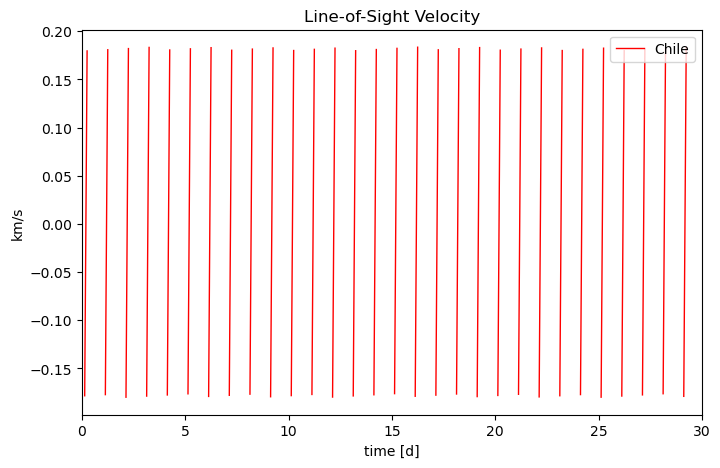

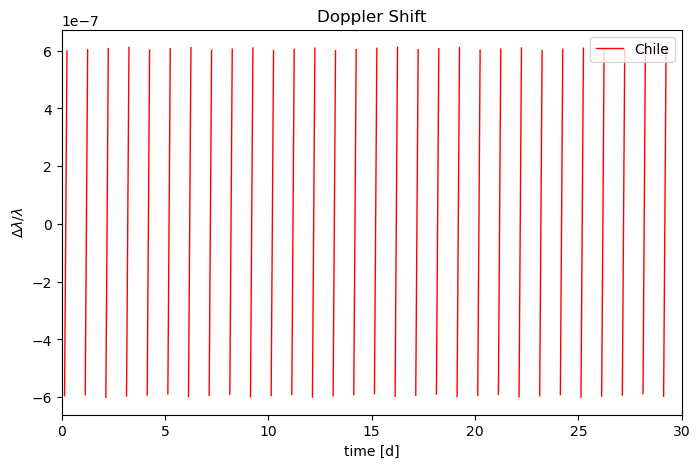

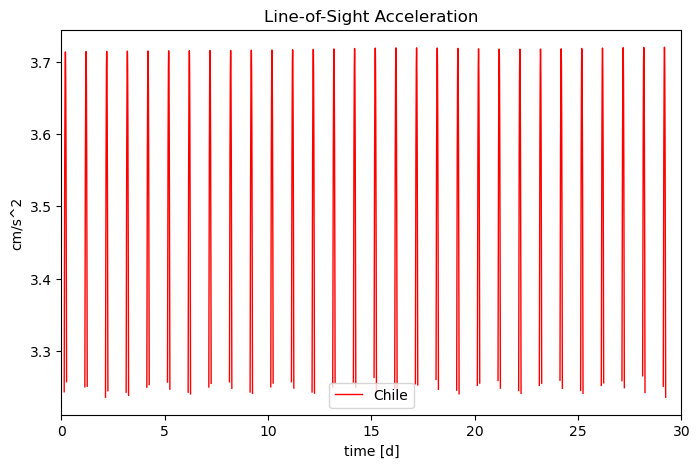

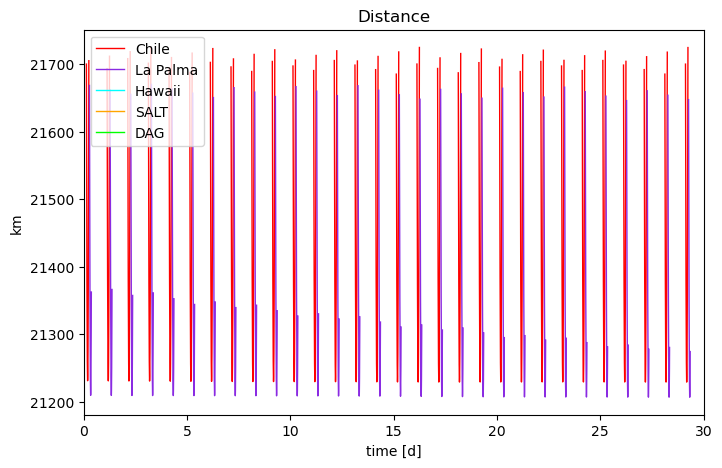

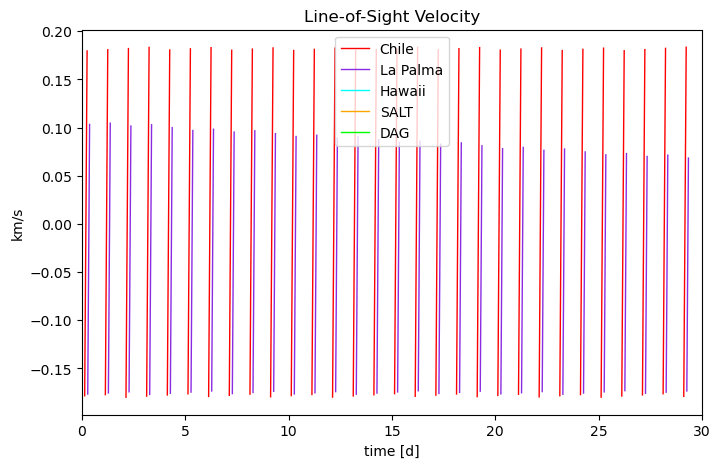

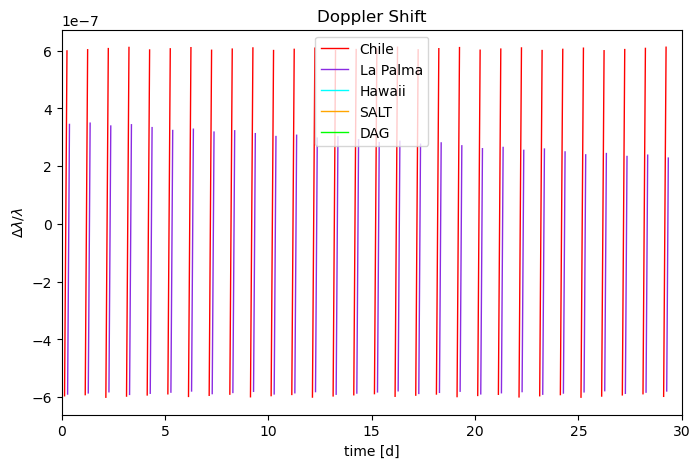

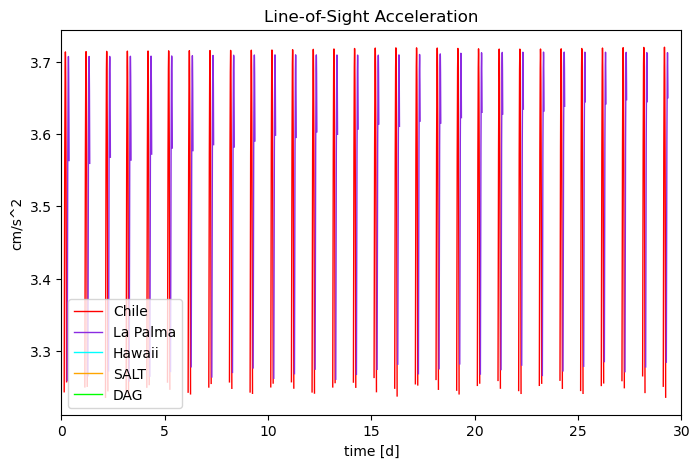

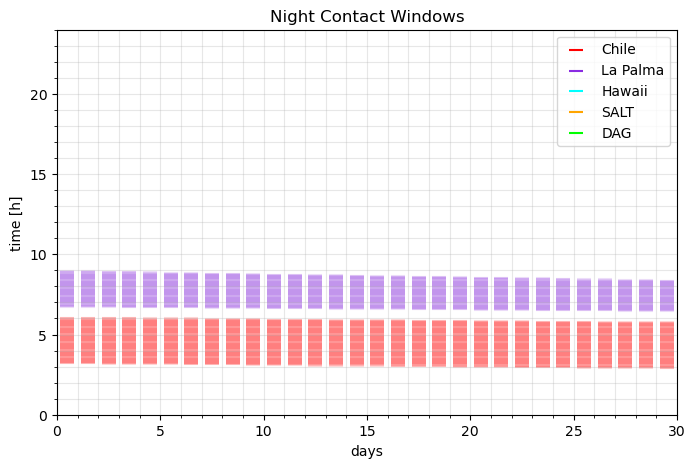

In [17]:
folder = "../Simulation/11.98h pro/new/"
xlim = [0,30]

plotting(folder,"ContactDuration.txt", "Contact Duration", "time[h]", [0,1,2,3,4], folder + "ContactTime.png", xlim)
plotting(folder,"ContactDuration.txt", "Contact Duration", "time[h]", [0], folder + "ContactTimeChile.png", xlim)

plotting(folder,"Tracking Speed.txt", "Tracking Speed", "arcsec/s", [0,1,2,3,4], folder + "TrackingSpeed.png", xlim)
plotting(folder,"Tracking Speed.txt", "Tracking Speed", "arcsec/s", [0], folder + "TrackingSpeedChile.png", xlim)

plotting(folder,"Azimuthal Speed.txt", "Azimuthal Tracking Speed", "arcsec/s", [0,1,2,3,4], folder + "AzimuthalSpeed.png", xlim)
plotting(folder,"Azimuthal Speed.txt", "Azimuthal Tracking Speed", "arcsec/s", [0], folder + "AzimuthalSpeedChile.png", xlim)

plotting(folder,"Elevation Speed.txt", "Elevation Tracking Speed", "arcsec/s", [0,1,2,3,4], folder + "ElevationSpeed.png", xlim)
plotting(folder,"Elevation Speed.txt", "Elevation Tracking Speed", "arcsec/s", [0], folder + "ElevationSpeedChile.png", xlim)

plotting(folder,"Distances.txt", "Distance", "km", [0], folder + "DistanceChile.png", xlim)
plotting(folder,"Distances.txt", "Distance", "km", [0,1,2,3,4], folder + "Distance.png", xlim)

plot_visibility(folder,"InContact.txt", "Night Contact Windows", "km", [0,1,2,3,4], folder + "InContact.png", xlim)



In [ ]:
folder = "../Simulation/9.77h pro/year/"
xlim = [0,365]
plot_visibility(folder,"InContact.txt", "Night Contact Windows", "km", [0,1,2,3,4], folder + "InContact.png", xlim)
